<a href="https://colab.research.google.com/github/muhamadfarrelrizqullah/PCVK_Ganjil_2023/blob/main/ProjekKelompok14_PCVK.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src = "https://raw.githubusercontent.com/alvianfirdaus/Kelompok3_ML/main/Kuis%201/img/header.png"><p><table>
  <tr>
    <th>Mata Kuliah </th>
    <td>Pengolahan Citra Visi Komputer</td>
  </tr>
  <tr>
    <th>Ide Projek</th>
    <td>Deteksi Objek Mobil dalam Parkiran</td>
  </tr>

  <tr>
    <th>Kelompok</th>
    <td>Kelompok 14</td>
  </tr>
  <tr>
    <th>Nama Anggota Kelompok</th>
    <td><p>
     Mochammad Aditya Bagus / 2041720093<p>
     Muhamad Farrel Rizqullah / 2141720243<p>
</td>
  </tr>
</table>

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
import cv2
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

In [28]:
img = cv2.imread('/content/sample_data/original.jpg')

In [30]:
def plot_image(img: np.array):
  plt.figure(figsize=(6, 6))
  plt.imshow(img, cmap='gray');

def plot_two_images(img1: np.array, img2: np.array):
  _, ax = plt.subplots(1, 2, figsize=(12, 6))
  ax[0].imshow(img1, cmap='gray')
  ax[1].imshow(img2, cmap='gray');

In [31]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

kernel_size = 5
blur_gray = cv2.GaussianBlur(gray, (kernel_size, kernel_size), 0)

In [32]:
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

In [43]:
rho = 1
theta = np.pi / 180
threshold = 15
min_line_length = 5
max_line_gap = 20
line_image = np.copy(img) * 0

lines = cv2.HoughLinesP(edges, rho, theta, threshold, np.array([]), min_line_length, max_line_gap)

for line in lines:
  for x1, y1, x2, y2 in line:
    cv2.line(line_image, (x1, y1), (x2, y2), (0, 0, 255), 5)

In [44]:
lines_edges = cv2.addWeighted(img, 0.8, line_image, 1, 0)

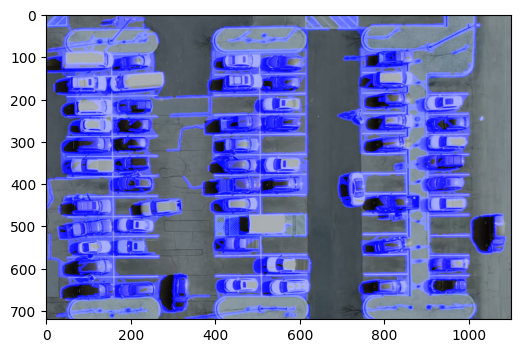

In [45]:
plot_image(lines_edges)